<a href="https://colab.research.google.com/github/RaamVijith/Dengue_forecasting_MachineLearnig_Algorithms-/blob/main/SVR_Model_Dengue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import timedelta


In [146]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

df1 = pd.read_csv("Dengue_Data_colombo.csv")
df2 = pd.read_csv("timeseries_data_colombo.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 appsheet		      IMG_20211006_1048181111sign.jpg
 Classroom		     'IMG_E0085Lo Qulty.jpg'
'Colab Notebooks'	     'IMG_E0087lo Qulty.jpg'
 CV_Ramalingam_Vijithan.pdf  'Mini Project final presentation template(2022).pptx'
 dataset		     'My Drive'
 Fiverr			      Research
/content/gdrive/My Drive/dataset


In [147]:
df=pd.merge(df1,df2,left_on="Date",right_on="time")
df = df[['Date','Value','temperature_2m_mean','rain_sum','windspeed_10m_max']]
df['Date'] = pd.to_datetime(df['Date'])


In [148]:
# Prepare the data
X = df[['Value','temperature_2m_mean', 'rain_sum', 'windspeed_10m_max']]
y = df['Value']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
# Build the SVR model
svr = SVR(kernel='linear', C=8.0, epsilon=0.2)
svr.fit(X_train, y_train)


SVR(C=8.0, epsilon=0.2, kernel='linear')

In [152]:
# Make predictions
y_pred = svr.predict(X_test)

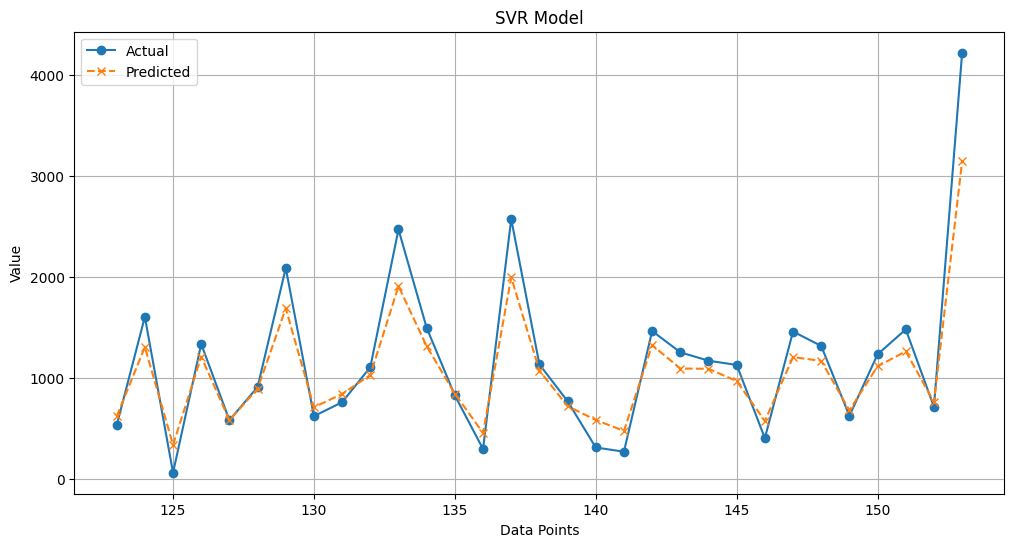

In [153]:
# Plot the high accuracy graph
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted', linestyle='--', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.legend()
plt.title('SVR Model')
plt.grid(True)
plt.show()

In [154]:
# Predict the training and testing data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)


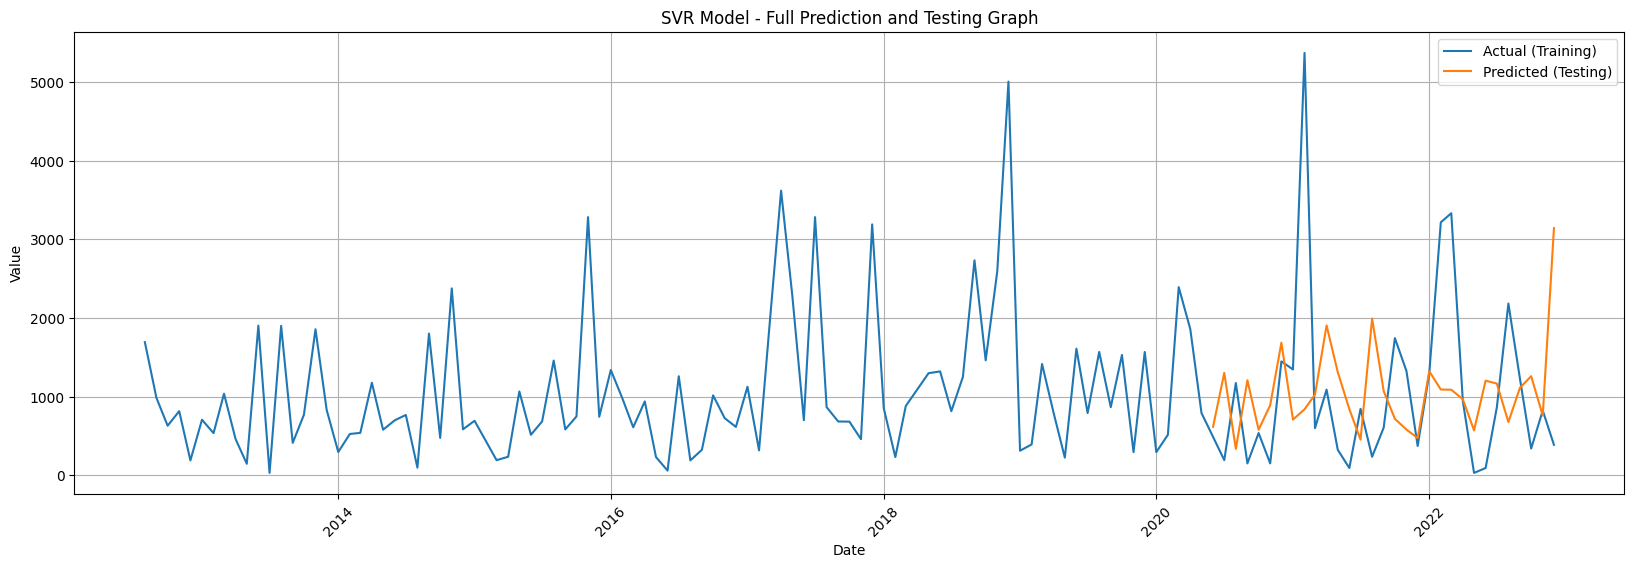

In [155]:
# full graph of predictions and testing results
plt.figure(figsize=(20, 6))
plt.plot(df['Date'][-len(X_train):], y_train, label='Actual (Training)')
#plt.plot(df['Date'][-len(X_train):], y_train_pred, label='Predicted (Training)', linestyle='--')
#plt.plot(df['Date'][-len(X_test):], y_test, label='Actual (Testing)')
plt.plot(df['Date'][-len(X_test):], y_test_pred, label='Predicted (Testing)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('SVR Model - Full Prediction and Testing Graph')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [156]:
# Calculate accuracy (you can use any relevant metric, e.g., R-squared or Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Accuracy: {r2:.2f}")

Mean Squared Error: 84196.10
R-squared Accuracy: 0.87
